In [97]:
!pip install scikit-learn==1.1.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import numpy as np
import pandas as pd
import nltk
import re
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)
import seaborn as sns
from sklearn.model_selection import train_test_split
# Performance metric
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn. feature_extraction. text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import ipaddress


For colab


In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Read Data 
df1 = pd.read_csv("/content/drive/MyDrive/dataset_sdn.csv")
df1

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


For jupyter or local


In [ ]:
# Read Data 
df1 = pd.read_csv("dataset_sdn.csv")
df1

In [101]:
df1.isna().any()

dt             False
switch         False
src            False
dst            False
pktcount       False
bytecount      False
dur            False
dur_nsec       False
tot_dur        False
flows          False
packetins      False
pktperflow     False
byteperflow    False
pktrate        False
Pairflow       False
Protocol       False
port_no        False
tx_bytes       False
rx_bytes       False
tx_kbps        False
rx_kbps         True
tot_kbps        True
label          False
dtype: bool

In [102]:
df1 = df1.dropna()

In [103]:
df1.dataframeName = 'Final.csv'

In [104]:
df1.isna().any()

dt             False
switch         False
src            False
dst            False
pktcount       False
bytecount      False
dur            False
dur_nsec       False
tot_dur        False
flows          False
packetins      False
pktperflow     False
byteperflow    False
pktrate        False
Pairflow       False
Protocol       False
port_no        False
tx_bytes       False
rx_bytes       False
tx_kbps        False
rx_kbps        False
tot_kbps       False
label          False
dtype: bool

In [105]:
ip=[]

for i in df1['src']:
    j=i.split(',')
    ip.append(j)

    

In [106]:
all_ip = sum(ip,[])
len(set(all_ip))

19

In [107]:
all_ip = nltk.FreqDist(all_ip) 
# create dataframe
all_ip_df = pd.DataFrame({'ip': list(all_ip.keys()), 
                              'Count': list(all_ip.values())})

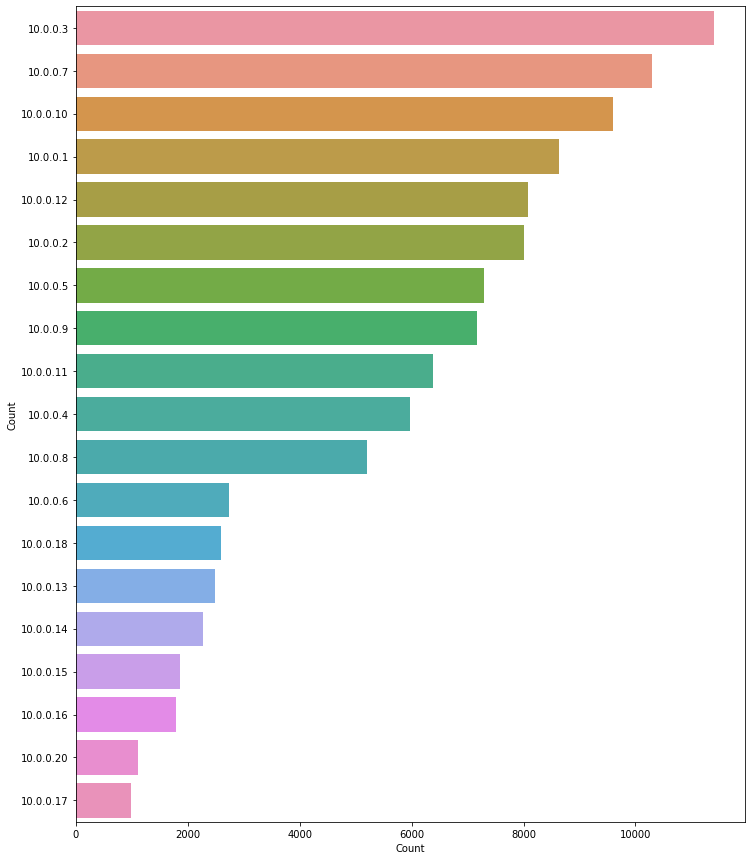

In [108]:
#visualizing the genre data and the rate of their occurrence using seaborn library
g = all_ip_df.nlargest(columns="Count", n = 44) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "ip") 
ax.set(ylabel = 'Count') 
plt.show()

In [109]:
y = df1['label']

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-

In [111]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    

In [112]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-111-0d9dbf123b39>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


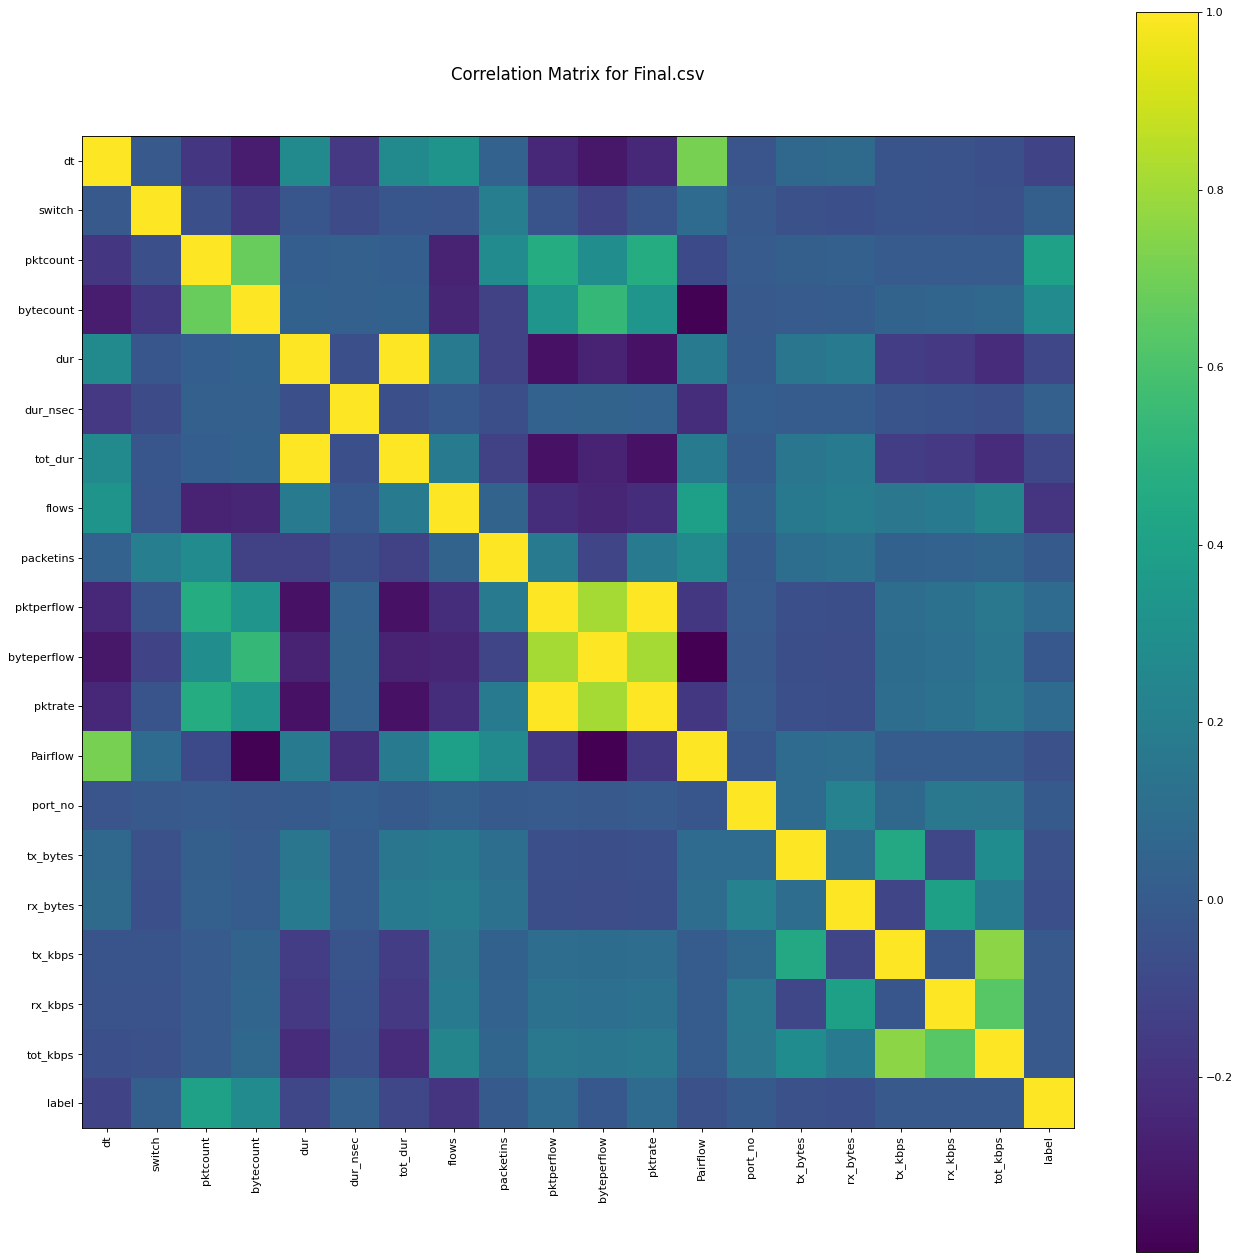

In [113]:
plotCorrelationMatrix(df1, 20)

<ipython-input-112-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


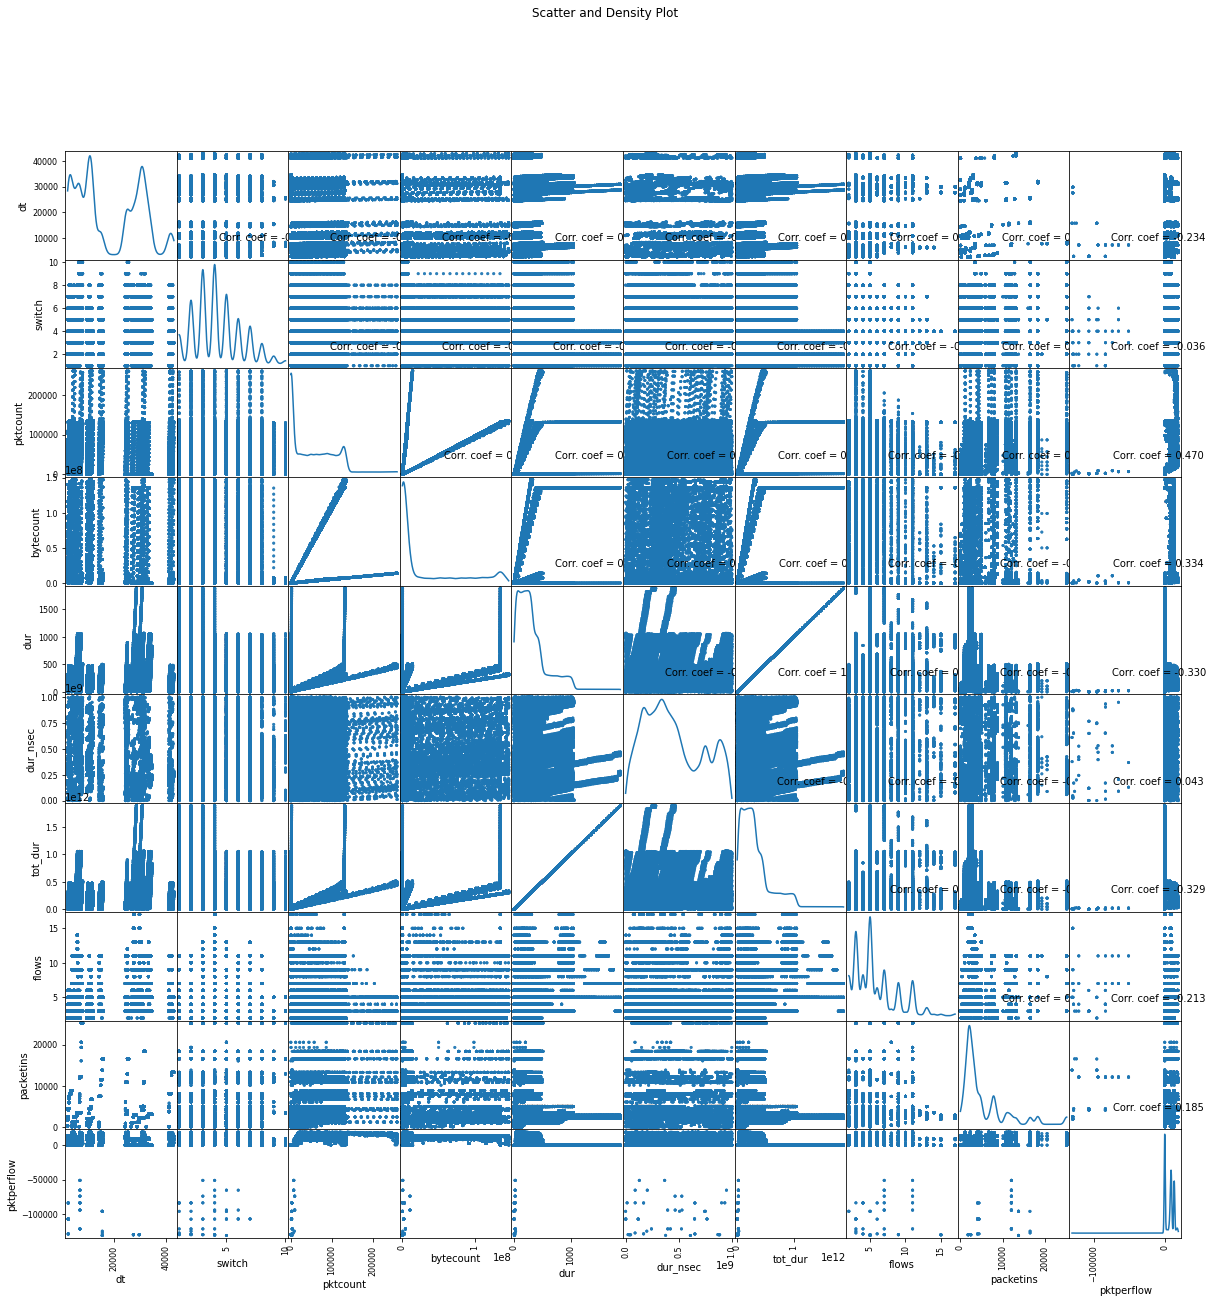

In [114]:
plotScatterMatrix(df1, 20, 10)

In [115]:
feature_set = ['dt','switch','src','dst','pktcount','bytecount','dur','dur_nsec','tot_dur',
               'flows','packetins','pktperflow','byteperflow','pktrate','Pairflow','Protocol','port_no','tx_bytes','rx_bytes','tx_kbps','rx_kbps','tot_kbps']

In [116]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
le = OrdinalEncoder()
le.fit(df1)
cat_encoded = le.fit_transform(df1[feature_set[1:]])
print(type(cat_encoded), cat_encoded.shape)
cont_data = df1[feature_set[0]].to_numpy().reshape(-1,1) 
print(type(cont_data), cont_data.shape)
x_data = np.append(cat_encoded, cont_data, axis=1)
print(x_data.shape)
y_labels = df1['label']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.4, random_state=42)

<class 'numpy.ndarray'> (103839, 21)
<class 'numpy.ndarray'> (103839, 1)
(103839, 22)


In [117]:
x_data

array([[0.0000e+00, 0.0000e+00, 1.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.1425e+04],
       [0.0000e+00, 0.0000e+00, 1.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.1605e+04],
       [0.0000e+00, 1.0000e+01, 1.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.1425e+04],
       ...,
       [2.0000e+00, 2.0000e+00, 1.3000e+01, ..., 0.0000e+00, 0.0000e+00,
        5.2620e+03],
       [2.0000e+00, 2.0000e+00, 1.3000e+01, ..., 1.0000e+00, 2.0000e+00,
        5.2620e+03],
       [2.0000e+00, 2.0000e+00, 1.3000e+01, ..., 1.0000e+00, 2.0000e+00,
        5.2620e+03]])

## MODEL-1

In [118]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
# Create a tree object
model1 =LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', 
                               max_iter=10000, multi_class='auto', verbose=0, n_jobs=None, l1_ratio=None)
# Ask the tree to fit the data to the labels!  That's it!
model1 = model1.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, model1.predict(X_test))

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model1.predict(X_test))

0.8754092835130971

In [120]:
accuracy_score(y_train, model1.predict(X_train))

0.8781439096030689

In [121]:
results.shape,X_train.shape

((2, 2), (62303, 22))

In [122]:
y_pred1  =  model1.predict(X_test)
y_pred1

array([0, 1, 0, ..., 0, 0, 1])

In [123]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[22987,  2355],
       [ 2820, 13374]])

In [124]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     25342
           1       0.85      0.83      0.84     16194

    accuracy                           0.88     41536
   macro avg       0.87      0.87      0.87     41536
weighted avg       0.87      0.88      0.88     41536



In [125]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob1

array([[0.78488098, 0.21511902],
       [0.00391388, 0.99608612],
       [0.97687564, 0.02312436],
       ...,
       [0.98777147, 0.01222853],
       [0.97444864, 0.02555136],
       [0.06659656, 0.93340344]])

In [126]:
y_test1=y_test

In [127]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model1.predict(X_train))
training_error

0.12185609039693113

In [128]:
testing_error = mean_squared_error(y_test,y_pred1)
testing_error

0.12459071648690292

## MODEL-2

In [129]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(criterion='gini',min_samples_split = 10000,min_samples_leaf = 1000,max_leaf_nodes = 10000,
                             n_estimators = 1000, random_state = 1000,bootstrap= True,oob_score=True)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_labels , test_size=0.4, random_state=42)

In [131]:
from sklearn.multiclass import OneVsRestClassifier
model2= OneVsRestClassifier(reg)
model2 = model2.fit(X_train, y_train)

In [132]:
y_pred2  =  model2.predict(X_test)
y_pred2

array([1, 1, 0, ..., 0, 0, 1])

In [133]:
accuracy_score(y_test,  model2.predict(X_test))

0.9431336671802774

In [134]:
accuracy_score(y_train, model2.predict(X_train))

0.9449625218689308

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     25342
           1       0.88      0.99      0.93     16194

    accuracy                           0.94     41536
   macro avg       0.94      0.95      0.94     41536
weighted avg       0.95      0.94      0.94     41536



In [136]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[23112,  2230],
       [  132, 16062]])

In [137]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model2.predict(X_train))
training_error

0.05503747813106913

In [138]:
testing_error = mean_squared_error(y_test,y_pred2)
testing_error

0.05686633281972265

In [139]:
pred_prob2 = model2.predict_proba(X_test)

In [140]:
y_test2=y_test

## MODEL-3

In [141]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels , test_size=0.4, random_state=42)

In [142]:
model3 = KNeighborsClassifier(n_neighbors=4,weights='distance',p=2, metric='minkowski',leaf_size=40)

In [143]:
model3 = model3.fit(X_train, y_train)

In [144]:
print(model3.predict(X_test))

[1 1 0 ... 0 0 1]


In [145]:
y_pred3=model3.predict(X_test)
y_pred3

array([1, 1, 0, ..., 0, 0, 1])

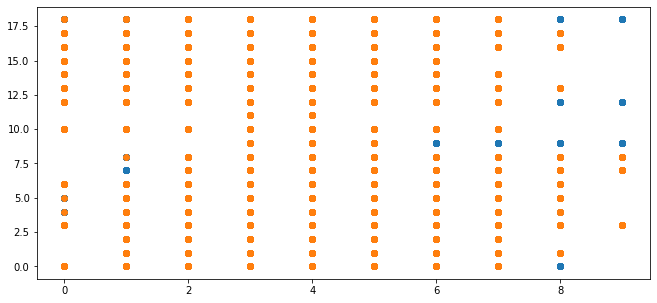

In [146]:
from numpy import unique
from numpy import where
# retrieve unique clusters
clusters = unique(y_pred3)
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(y_pred3 == cluster)
	# create scatter of these samples
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
# show the plot
plt.show()

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25342
           1       0.98      0.98      0.98     16194

    accuracy                           0.98     41536
   macro avg       0.98      0.98      0.98     41536
weighted avg       0.98      0.98      0.98     41536



In [148]:
accuracy_score(y_test, model3.predict(X_test))

0.9827619414483821

In [149]:
accuracy_score(y_train, model3.predict(X_train))

1.0

In [150]:
cm = confusion_matrix(y_test, y_pred3)
cm

array([[24989,   353],
       [  363, 15831]])

In [151]:
pred_prob3 = model3.predict_proba(X_test)

In [152]:
y_test3=y_test

In [153]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model3.predict(X_train))
training_error

0.0

In [154]:
testing_error = mean_squared_error(y_test,y_pred3)
testing_error

0.017238058551617873

## MODEL-4

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import OPTICS
# Binary Relevance

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels , test_size=0.4, random_state=42)

In [157]:
model4 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=10000, 
                              min_samples_leaf=1000, min_weight_fraction_leaf=0.0, max_features=14, random_state=50, max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, class_weight='balanced', ccp_alpha=0.01)

In [158]:
model4=model4.fit(X_train, y_train)

In [159]:
y_pred4 = model4.predict(X_test)
y_pred4

array([1, 1, 0, ..., 0, 0, 1])

In [160]:
accuracy_score(y_test, model4.predict(X_test))

0.9214657164869029

In [161]:
accuracy_score(y_train, model4.predict(X_train))

0.923839943501918

In [162]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     25342
           1       0.84      0.99      0.91     16194

    accuracy                           0.92     41536
   macro avg       0.92      0.93      0.92     41536
weighted avg       0.93      0.92      0.92     41536



In [163]:
pred_prob4 = model4.predict_proba(X_test)

In [164]:
y_test4=y_test

In [165]:
cm = confusion_matrix(y_test, y_pred4)
cm

array([[22262,  3080],
       [  182, 16012]])

In [166]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model4.predict(X_train))
training_error

0.07616005649808195

In [167]:
testing_error = mean_squared_error(y_test,y_pred4)
testing_error

0.07853428351309708

## MODEL-5

In [168]:
from sklearn.naive_bayes import GaussianNB

In [169]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels , test_size=0.4, random_state=42)

In [170]:
model5 = GaussianNB(priors=None, var_smoothing=1e-09)

In [171]:
model5=model5.fit(X_train, y_train)

In [172]:
y_pred5 = model5.predict(X_test)
y_pred5

array([0, 1, 0, ..., 0, 0, 0])

In [173]:
accuracy_score(y_test, model5.predict(X_test))

0.6648449537750385

In [174]:
accuracy_score(y_train, model5.predict(X_train))

0.667046530664655

In [175]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70     25342
           1       0.55      0.72      0.63     16194

    accuracy                           0.66     41536
   macro avg       0.67      0.68      0.66     41536
weighted avg       0.69      0.66      0.67     41536



In [176]:
pred_prob5 = model5.predict_proba(X_test)

In [177]:
y_test5=y_test

In [178]:
cm = confusion_matrix(y_test, y_pred5)
cm

array([[15890,  9452],
       [ 4469, 11725]])

In [179]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model5.predict(X_train))
training_error

0.33295346933534503

In [180]:
testing_error = mean_squared_error(y_test,y_pred5)
testing_error

0.3351550462249615

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels, test_size=0.4, random_state=42)

## MODEL-6

In [182]:
model6 = make_pipeline(StandardScaler(),LinearSVC(random_state=60, tol=1e-5, max_iter=20000))

In [183]:
model6.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=20000, random_state=60, tol=1e-05))])

In [184]:
print(model6.named_steps['linearsvc'].coef_)

[[ 2.31666738e-02  1.08261187e-02  4.50250600e-02  3.86875312e-02
   6.35225625e-01  5.26951484e-02  1.52174845e-02 -2.59267680e-01
   3.48726302e-02 -8.68394113e-02 -2.83251901e+00 -2.16458815e-01
   2.66050850e+00 -3.97886975e-02 -4.06787472e-03  1.27843108e-03
  -4.04156194e-02 -5.08718367e-02  8.75704323e-02  9.53560629e-02
  -5.16965411e-02  8.21773929e-02]]


In [185]:
print(model6.predict(X_test))

[0 1 0 ... 0 0 1]


In [186]:
accuracy_score(y_test, model6.predict(X_test))

0.8789002311248074

In [187]:
accuracy_score(y_train, model6.predict(X_train))

0.8811132690239636

In [188]:
y_pred6=model6.predict(X_test)

In [189]:
cm = confusion_matrix(y_test, y_pred6)
cm

array([[23456,  1886],
       [ 3144, 13050]])

In [190]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model6.predict(X_train))
training_error

0.11888673097603647

In [191]:
testing_error = mean_squared_error(y_test,y_pred5)
testing_error

0.3351550462249615

In [192]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     25342
           1       0.87      0.81      0.84     16194

    accuracy                           0.88     41536
   macro avg       0.88      0.87      0.87     41536
weighted avg       0.88      0.88      0.88     41536



In [193]:
cm = confusion_matrix(y_test, y_pred6)
cm

array([[23456,  1886],
       [ 3144, 13050]])

## ROC AUC Score and Curve

In [194]:
fpr1, tpr1, thresh1 = roc_curve(y_test1, pred_prob1[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test2, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test3, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test4, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test5, pred_prob5[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [195]:
# auc scores
auc_score1 = roc_auc_score(y_test1, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test2, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test3, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test4, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test5, pred_prob5[:,1])


print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)

0.9419929242240571 0.9877096997890398 0.9947515127793053 0.9631450135616424 0.7813891806694278


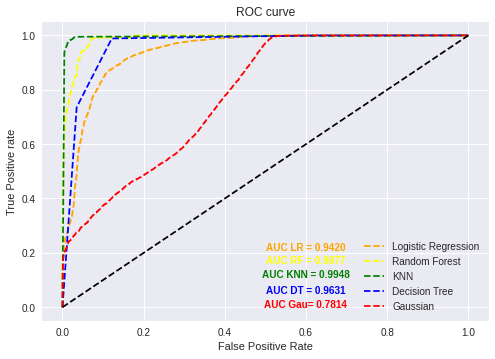

In [196]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.text(0.6, 0.21, 'AUC LR = %0.4f' % auc_score1, ha='center', fontsize=10, weight='bold', color='orange')
plt.text(0.6, 0.16, 'AUC RF = %0.4f' % auc_score2, ha='center', fontsize=10, weight='bold', color='yellow')
plt.text(0.6, 0.11, 'AUC KNN = %0.4f' % auc_score3, ha='center', fontsize=10, weight='bold', color='green')
plt.text(0.6, 0.05, 'AUC DT = %0.4f' % auc_score4, ha='center', fontsize=10, weight='bold', color='blue')
plt.text(0.6, 0.0, 'AUC Gau= %0.4f' % auc_score5, ha='center', fontsize=10, weight='bold', color='red')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.show();

## Dataset 2

In [197]:
# Read Data 
df2 = pd.read_csv("/content/drive/MyDrive/Finalv3.csv")
df2

,No.,Time,Source,Destination,Protocol,Length,Info,Attack,ABF
0,1,0.000000e+00,192.168.149.1,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1,0,0
1,2,2.940000e-07,192.168.149.1,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1,0,0
2,3,0.000000e+00,192.168.149.1,239.255.255.250,SSDP,219,M-SEARCH * HTTP/1.1,0,0
3,4,2.940000e-07,192.168.149.1,239.255.255.250,SSDP,219,M-SEARCH * HTTP/1.1,0,0
4,5,4.829006e-01,1e:45:44:22:5e:a7,3a:d3:73:44:cd:5e,ARP,42,10.0.0.6 is at 1e:45:44:22:5e:a7,1,1
...,...,...,...,...,...,...,...,...,...
126064,126065,2.368513e+03,be:d0:eb:d4:59:bd,ae:0d:0a:07:48:a8,ARP,42,10.0.0.4 is at be:d0:eb:d4:59:bd,0,1
126065,126066,2.368516e+03,be:d0:eb:d4:59:bd,ae:0d:0a:07:48:a8,ARP,42,Who has 10.0.0.2? Tell 10.0.0.4,0,1
126066,126067,2.368516e+03,be:d0:eb:d4:59:bd,ae:0d:0a:07:48:a8,ARP,42,Who has 10.0.0.2? Tell 10.0.0.4,0,1
126067,126068,2.368516e+03,ae:0d:0a:07:48:a8,be:d0:eb:d4:59:bd,ARP,42,10.0.0.2 is at ae:0d:0a:07:48:a8,0,1


In [198]:
df2.isna().any()

No.            False
Time           False
Source         False
Destination     True
Protocol       False
Length         False
Info            True
Attack         False
ABF            False
dtype: bool

In [199]:
df2 = df2.dropna()

In [200]:
df2=df2.drop("No.", axis='columns')
df2

,Time,Source,Destination,Protocol,Length,Info,Attack,ABF
0,0.000000e+00,192.168.149.1,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1,0,0
1,2.940000e-07,192.168.149.1,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1,0,0
2,0.000000e+00,192.168.149.1,239.255.255.250,SSDP,219,M-SEARCH * HTTP/1.1,0,0
3,2.940000e-07,192.168.149.1,239.255.255.250,SSDP,219,M-SEARCH * HTTP/1.1,0,0
4,4.829006e-01,1e:45:44:22:5e:a7,3a:d3:73:44:cd:5e,ARP,42,10.0.0.6 is at 1e:45:44:22:5e:a7,1,1
...,...,...,...,...,...,...,...,...
126064,2.368513e+03,be:d0:eb:d4:59:bd,ae:0d:0a:07:48:a8,ARP,42,10.0.0.4 is at be:d0:eb:d4:59:bd,0,1
126065,2.368516e+03,be:d0:eb:d4:59:bd,ae:0d:0a:07:48:a8,ARP,42,Who has 10.0.0.2? Tell 10.0.0.4,0,1
126066,2.368516e+03,be:d0:eb:d4:59:bd,ae:0d:0a:07:48:a8,ARP,42,Who has 10.0.0.2? Tell 10.0.0.4,0,1
126067,2.368516e+03,ae:0d:0a:07:48:a8,be:d0:eb:d4:59:bd,ARP,42,10.0.0.2 is at ae:0d:0a:07:48:a8,0,1


In [201]:
df2.dataframeName = 'Final2.csv'

In [202]:
df2.isna().any()

Time           False
Source         False
Destination    False
Protocol       False
Length         False
Info           False
Attack         False
ABF            False
dtype: bool

In [203]:
y = df2['ABF']

<ipython-input-111-0d9dbf123b39>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


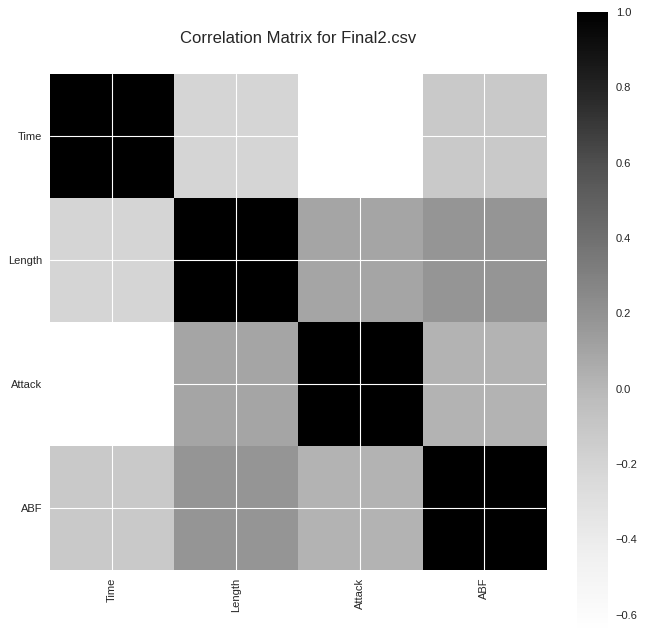

In [204]:
plotCorrelationMatrix(df2, 10)

<ipython-input-112-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


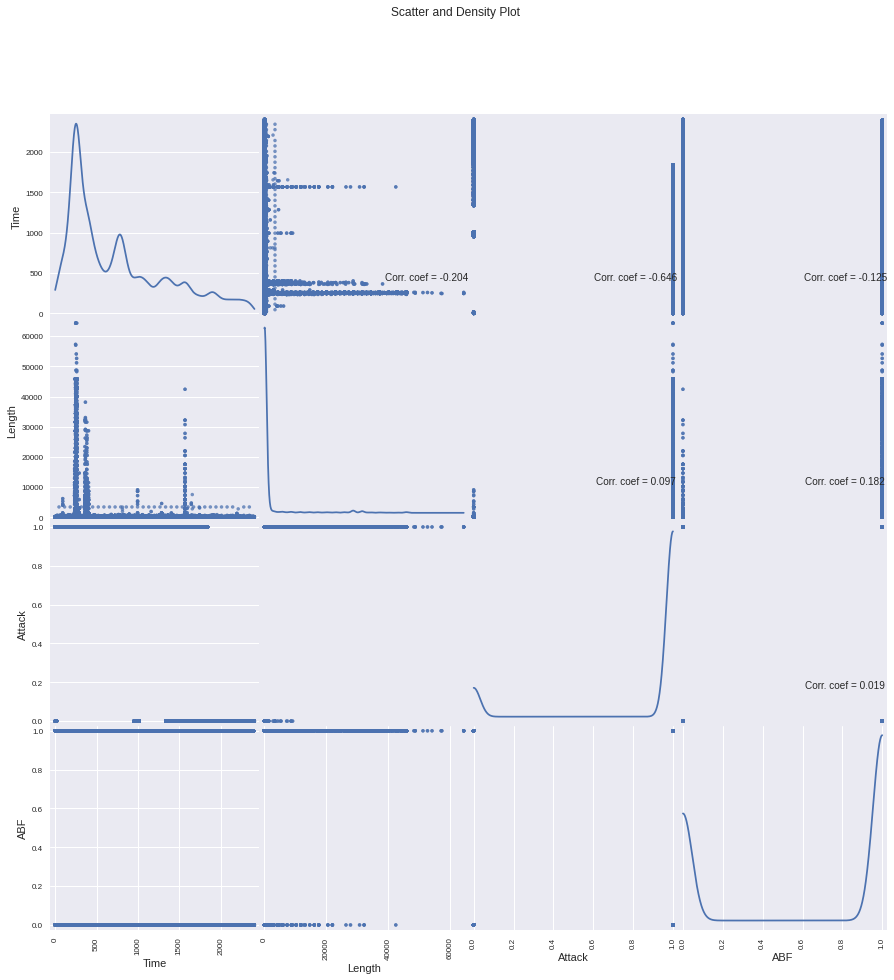

In [205]:
plotScatterMatrix(df2, 15, 10)

In [206]:
feature_set = ['Time','Source','Destination','Protocol','Length']

In [207]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
le = OrdinalEncoder()
le.fit(df2)
cat_encoded = le.fit_transform(df2[feature_set[1:]])
print(type(cat_encoded), cat_encoded.shape)
cont_data = df2[feature_set[0]].to_numpy().reshape(-1,1) 
print(type(cont_data), cont_data.shape)
x_data = np.append(cat_encoded, cont_data, axis=1)
print(x_data.shape)
y_labels = df2['ABF']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.4, random_state=42)

<class 'numpy.ndarray'> (117296, 4)
<class 'numpy.ndarray'> (117296, 1)
(117296, 5)


In [208]:
x_data

array([[5.20000000e+01, 7.00000000e+01, 1.50000000e+01, 1.58000000e+02,
        0.00000000e+00],
       [5.20000000e+01, 7.00000000e+01, 1.50000000e+01, 1.58000000e+02,
        2.94000000e-07],
       [5.20000000e+01, 7.00000000e+01, 1.50000000e+01, 1.60000000e+02,
        0.00000000e+00],
       ...,
       [1.50000000e+02, 1.40000000e+02, 1.00000000e+00, 0.00000000e+00,
        2.36851563e+03],
       [1.48000000e+02, 1.41000000e+02, 1.00000000e+00, 0.00000000e+00,
        2.36851594e+03],
       [1.48000000e+02, 1.41000000e+02, 1.00000000e+00, 0.00000000e+00,
        2.36851597e+03]])

## MODEL-1

In [209]:
model1=model1.fit(X_train,y_train)

In [210]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model1.predict(X_test))

0.8370809267034677

In [211]:
accuracy_score(y_train, model1.predict(X_train))

0.8372479645338676

In [212]:
y_pred1  =  model1.predict(X_test)
y_pred1

array([0, 0, 1, ..., 1, 1, 0])

In [213]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[12584,  4567],
       [ 3077, 26691]])

In [214]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77     17151
           1       0.85      0.90      0.87     29768

    accuracy                           0.84     46919
   macro avg       0.83      0.82      0.82     46919
weighted avg       0.84      0.84      0.84     46919



In [215]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob1

array([[0.63292757, 0.36707243],
       [0.58636608, 0.41363392],
       [0.41973803, 0.58026197],
       ...,
       [0.15245293, 0.84754707],
       [0.48987369, 0.51012631],
       [0.55835558, 0.44164442]])

In [216]:
y_test1=y_test

In [217]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model1.predict(X_train))
training_error

0.1627520354661324

In [218]:
testing_error = mean_squared_error(y_test,y_pred1)
testing_error

0.16291907329653232

## MODEL-2

In [219]:
model2=model2.fit(X_train,y_train)

In [220]:
y_pred2  =  model2.predict(X_test)
y_pred2

array([0, 0, 1, ..., 1, 1, 0])

In [221]:
accuracy_score(y_test,  model2.predict(X_test))

0.981755791896673

In [222]:
accuracy_score(y_train, model2.predict(X_train))

0.9811728263495176

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17151
           1       0.98      0.99      0.99     29768

    accuracy                           0.98     46919
   macro avg       0.98      0.98      0.98     46919
weighted avg       0.98      0.98      0.98     46919



In [224]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[16629,   522],
       [  334, 29434]])

In [225]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model2.predict(X_train))
training_error

0.018827173650482403

In [226]:
testing_error = mean_squared_error(y_test,y_pred2)
testing_error

0.01824420810332701

In [227]:
pred_prob2 = model2.predict_proba(X_test)

In [228]:
y_test2=y_test

## MODEL-3

In [229]:
model3 = model3.fit(X_train, y_train)

In [230]:
print(model3.predict(X_test))

[0 0 1 ... 1 1 0]


In [231]:
y_pred3=model3.predict(X_test)
y_pred3

array([0, 0, 1, ..., 1, 1, 0])

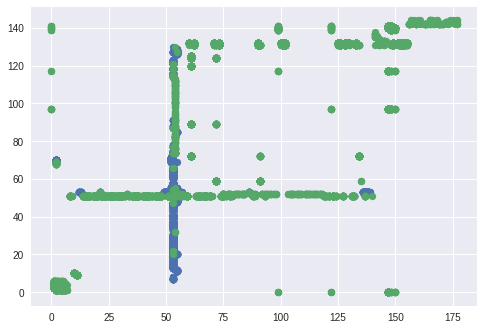

In [232]:
from numpy import unique
from numpy import where
# retrieve unique clusters
clusters = unique(y_pred3)
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(y_pred3 == cluster)
	# create scatter of these samples
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
# show the plot
plt.show()

In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17151
           1       1.00      0.99      1.00     29768

    accuracy                           0.99     46919
   macro avg       0.99      0.99      0.99     46919
weighted avg       0.99      0.99      0.99     46919



In [234]:
accuracy_score(y_test, model3.predict(X_test))

0.9945011615763337

In [235]:
accuracy_score(y_train, model3.predict(X_train))

1.0

In [236]:
cm = confusion_matrix(y_test, y_pred3)
cm

array([[17096,    55],
       [  203, 29565]])

In [237]:
pred_prob3 = model3.predict_proba(X_test)

In [238]:
y_test3=y_test

## MODEL-4

In [239]:
model4 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=5, random_state=50, max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.01)

In [240]:
model4=model4.fit(X_train, y_train)

In [241]:
y_pred4 = model4.predict(X_test)
y_pred4

array([0, 0, 1, ..., 1, 1, 0])

In [242]:
accuracy_score(y_test, model4.predict(X_test))

0.9840576312368123

In [243]:
accuracy_score(y_train, model4.predict(X_train))

0.9838299444420763

In [244]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17151
           1       0.99      0.99      0.99     29768

    accuracy                           0.98     46919
   macro avg       0.98      0.98      0.98     46919
weighted avg       0.98      0.98      0.98     46919



In [245]:
pred_prob4 = model4.predict_proba(X_test)

In [246]:
y_test4=y_test

In [247]:
cm = confusion_matrix(y_test, y_pred4)
cm

array([[16779,   372],
       [  376, 29392]])

In [248]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model4.predict(X_train))
training_error

0.016170055557923755

In [249]:
testing_error = mean_squared_error(y_test,y_pred4)
testing_error

0.015942368763187623

## MODEL-5

In [250]:
model5 = GaussianNB(priors=None, var_smoothing=1e-09)

In [251]:
model5=model5.fit(X_train, y_train)

In [252]:
y_pred5 = model5.predict(X_test)
y_pred5

array([0, 0, 1, ..., 1, 0, 0])

In [253]:
accuracy_score(y_test, model5.predict(X_test))

0.9126579850380443

In [254]:
accuracy_score(y_train, model5.predict(X_train))

0.9095158929763986

In [255]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model5.predict(X_train))
training_error

0.09048410702360146

In [256]:
testing_error = mean_squared_error(y_test,y_pred5)
testing_error

0.0873420149619557

In [257]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     17151
           1       0.94      0.92      0.93     29768

    accuracy                           0.91     46919
   macro avg       0.90      0.91      0.91     46919
weighted avg       0.91      0.91      0.91     46919



In [258]:
pred_prob5 = model5.predict_proba(X_test)

In [259]:
y_test5=y_test

In [260]:
cm = confusion_matrix(y_test, y_pred5)
cm

array([[15298,  1853],
       [ 2245, 27523]])

## MODEL-6

In [261]:
model6 = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))

In [262]:
model6.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [263]:
print(model6.named_steps['linearsvc'].coef_)

[[-0.4102503   0.02759191 -0.76215088  0.49365883 -0.0797838 ]]


In [264]:
print(model6.predict(X_test))

[0 0 1 ... 1 1 0]


In [265]:
y_pred6=model6.predict(X_test)
y_pred6

array([0, 0, 1, ..., 1, 1, 0])

In [266]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model6.predict(X_train))
training_error

0.1622689230856672

In [267]:
testing_error = mean_squared_error(y_test,y_pred6)
testing_error

0.1618534069353567

In [268]:
accuracy_score(y_test, model5.predict(X_test))

0.9126579850380443

In [269]:
accuracy_score(y_train, model5.predict(X_train))

0.9095158929763986

In [272]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     17151
           1       0.88      0.86      0.87     29768

    accuracy                           0.84     46919
   macro avg       0.82      0.83      0.83     46919
weighted avg       0.84      0.84      0.84     46919



In [273]:
cm = confusion_matrix(y_test, y_pred6)
cm

array([[13586,  3565],
       [ 4029, 25739]])

## AUC ROC Curve score and Graph

In [274]:
fpr1, tpr1, thresh1 = roc_curve(y_test1, pred_prob1[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test2, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test3, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test4, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test5, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [275]:
# auc scores
auc_score1 = roc_auc_score(y_test1, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test2, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test3, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test4, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test5, pred_prob5[:,1])


print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)

0.8529274142909862 0.9983716963592164 0.9976081839492271 0.9896453413442553 0.9523254708626858


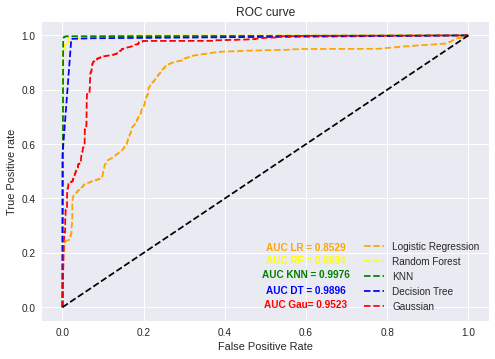

In [276]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.text(0.6, 0.21, 'AUC LR = %0.4f' % auc_score1, ha='center', fontsize=10, weight='bold', color='orange')
plt.text(0.6, 0.16, 'AUC RF = %0.4f' % auc_score2, ha='center', fontsize=10, weight='bold', color='yellow')
plt.text(0.6, 0.11, 'AUC KNN = %0.4f' % auc_score3, ha='center', fontsize=10, weight='bold', color='green')
plt.text(0.6, 0.05, 'AUC DT = %0.4f' % auc_score4, ha='center', fontsize=10, weight='bold', color='blue')
plt.text(0.6, 0.0, 'AUC Gau= %0.4f' % auc_score5, ha='center', fontsize=10, weight='bold', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.show();

# References

Scikit-learn.org. (2019). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/index.html.


GitHub. (n.d.). False review detection and model comparision · harshika14/CMPE-257_ProjectTeam12@0d25e01. [online] Available at: https://github.com/harshika14/CMPE-257_ProjectTeam12/commit/0d25e010a9387719c414b1589c74ebdfccc6678e?cv=1 [Accessed 1 June. 2022].

‌
BHANDARI, A. (2020). AUC-ROC Curve in Machine Learning Clearly Explained. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ [Accessed 1 June. 2022].


Brownlee, J. (2020). 10 Clustering Algorithms With Python. [online] MachineLearningMastery.com. Available at: https://machinelearningmastery.com/clustering-algorithms-with-python/?cv=1&fbclid=IwAR3i9bv5u0l9gPN0FzJ2x3bl01IWJh8LfCQfGoZnFl-AmEY3HC0GGPldu-Q [Accessed 9 Jan. 2023].

‌